In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import fastf1 as f1
from fastf1 import plotting
from ing_theme_matplotlib import mpl_style
import mplcyberpunk

In [15]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

*Qualifying*

In [16]:
quali = f1.get_session(2025, "Saudi Arabia", "Qualifying")
quali.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '63', '16', '12', '55', '44', '22', '10', '4', '23', '30', '14', '6', '87', '18', '7', '27', '31', '5']


In [17]:
quali.session_info

{'Meeting': {'Key': 1258,
  'Name': 'Saudi Arabian Grand Prix',
  'OfficialName': 'FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2025',
  'Location': 'Jeddah',
  'Number': 5,
  'Country': {'Key': 153, 'Code': 'KSA', 'Name': 'Saudi Arabia'},
  'Circuit': {'Key': 149, 'ShortName': 'Jeddah'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 10018,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2025, 4, 19, 20, 0),
 'EndDate': datetime.datetime(2025, 4, 19, 21, 0),
 'GmtOffset': datetime.timedelta(seconds=10800),
 'Path': '2025/2025-04-20_Saudi_Arabian_Grand_Prix/2025-04-19_Qualifying/'}

In [18]:
quali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
1,VER,Red Bull Racing,NaN,1.0,NaT,
81,PIA,McLaren,NaN,2.0,NaT,
63,RUS,Mercedes,NaN,3.0,NaT,
16,LEC,Ferrari,NaN,4.0,NaT,
12,ANT,Mercedes,NaN,5.0,NaT,
55,SAI,Williams,NaN,6.0,NaT,
44,HAM,Ferrari,NaN,7.0,NaT,
22,TSU,Red Bull Racing,NaN,8.0,NaT,
10,GAS,Alpine,NaN,9.0,NaT,
4,NOR,McLaren,NaN,10.0,NaT,


In [19]:
quali_laps = quali.laps
quali_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:16:46.977000,NOR,4,NaT,1.0,1.0,0 days 00:14:49.144000,NaT,NaT,0 days 00:00:32.852000,...,True,McLaren,0 days 00:14:49.144000,2025-04-19 17:01:32.783,1,NaN,False,,False,False
1,0 days 00:18:15.003000,NOR,4,0 days 00:01:28.026000,2.0,1.0,NaT,NaT,0 days 00:00:31.966000,0 days 00:00:27.831000,...,True,McLaren,0 days 00:16:46.977000,2025-04-19 17:03:30.616,1,NaN,False,,False,True
2,0 days 00:20:17.146000,NOR,4,0 days 00:02:02.143000,3.0,1.0,NaT,NaT,0 days 00:00:47.674000,0 days 00:00:35.186000,...,True,McLaren,0 days 00:18:15.003000,2025-04-19 17:04:58.642,1,NaN,False,,False,True
3,0 days 00:22:25.848000,NOR,4,0 days 00:02:08.702000,4.0,1.0,NaT,NaT,0 days 00:00:54.400000,0 days 00:00:36.587000,...,True,McLaren,0 days 00:20:17.146000,2025-04-19 17:07:00.785,1,NaN,False,,False,True
4,0 days 00:23:53.653000,NOR,4,0 days 00:01:27.805000,5.0,1.0,NaT,NaT,0 days 00:00:31.801000,0 days 00:00:27.831000,...,True,McLaren,0 days 00:22:25.848000,2025-04-19 17:09:09.487,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0 days 00:23:49.240000,STR,18,0 days 00:01:28.645000,5.0,2.0,NaT,NaT,0 days 00:00:32.072000,0 days 00:00:28.054000,...,True,Aston Martin,0 days 00:22:20.595000,2025-04-19 17:09:04.234,1,NaN,False,,False,True
285,0 days 00:25:40.885000,STR,18,0 days 00:01:51.645000,6.0,2.0,NaT,0 days 00:25:39.765000,0 days 00:00:40.013000,0 days 00:00:32.239000,...,True,Aston Martin,0 days 00:23:49.240000,2025-04-19 17:10:32.879,1,NaN,False,,False,False
286,0 days 00:30:04.281000,STR,18,NaT,7.0,3.0,0 days 00:28:07.363000,NaT,NaT,0 days 00:00:33.825000,...,True,Aston Martin,0 days 00:25:40.885000,2025-04-19 17:12:24.524,1,NaN,False,,False,False
287,0 days 00:31:33.466000,STR,18,0 days 00:01:29.185000,8.0,3.0,NaT,NaT,0 days 00:00:32.537000,0 days 00:00:28.170000,...,True,Aston Martin,0 days 00:30:04.281000,2025-04-19 17:16:47.920,12,NaN,False,,False,True


In [20]:
ver_quali_laps = quali.laps.pick_driver("VER")
fastest_lap_ver_quali = ver_quali_laps.pick_fastest().LapTime
ver_quali_lap_time = ver_quali_laps["LapTime"]
ver_quali_sec1 = ver_quali_laps["Sector1Time"]
ver_quali_sec2 = ver_quali_laps["Sector2Time"]
ver_quali_sec3 = ver_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_quali), "which was in Lap number" ,ver_quali_laps.pick_fastest().LapNumber)
ver_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:27.294000 which was in Lap number 18.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
44,NaT,NaT,0 days 00:00:33.289000,0 days 00:00:34.175000,265.0,290.0,311.0,292.0
45,0 days 00:01:28.148000,0 days 00:00:31.970000,0 days 00:00:27.841000,0 days 00:00:28.337000,296.0,329.0,300.0,333.0
46,0 days 00:02:04.482000,0 days 00:00:48.533000,0 days 00:00:36.018000,0 days 00:00:39.931000,245.0,243.0,NaN,218.0
47,NaT,NaT,0 days 00:00:34.241000,0 days 00:00:32.161000,237.0,282.0,309.0,306.0
48,0 days 00:01:27.778000,0 days 00:00:31.874000,0 days 00:00:27.813000,0 days 00:00:28.091000,295.0,330.0,310.0,335.0


In [21]:
fastest_lap_ver_quali = ver_quali_laps.pick_fastest()
tele_ver_quali = fastest_lap_ver_quali.get_telemetry().add_distance()
speed_ver_quali = tele_ver_quali.Speed
tele_ver_quali.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,317,8,11296
3,318,8,11313
4,320,8,11348
5,321,8,11400
6,323,8,11453
...,...,...,...
657,308,8,10963
658,309,8,10976
659,310,8,11022
660,312,8,11069


In [22]:
pia_quali_laps = quali.laps.pick_driver("PIA")
fastest_lap_pia_quali = pia_quali_laps.pick_fastest().LapTime
pia_quali_lap_time = pia_quali_laps["LapTime"]
pia_quali_sec1 = pia_quali_laps["Sector1Time"]
pia_quali_sec2 = pia_quali_laps["Sector2Time"]
pia_quali_sec3 = pia_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_pia_quali), "which was in Lap number" ,pia_quali_laps.pick_fastest().LapNumber)
pia_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:27.304000 which was in Lap number 17.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
10,NaT,NaT,0 days 00:00:31.557000,0 days 00:00:41.919000,264.0,263.0,308.0,270.0
11,0 days 00:01:28.019000,0 days 00:00:32.028000,0 days 00:00:27.771000,0 days 00:00:28.220000,295.0,322.0,307.0,333.0
12,0 days 00:02:06.605000,0 days 00:00:44.022000,0 days 00:00:41.087000,0 days 00:00:41.496000,240.0,266.0,NaN,276.0
13,NaT,NaT,0 days 00:00:35.160000,0 days 00:00:32.360000,235.0,296.0,307.0,309.0
14,0 days 00:01:27.901000,0 days 00:00:31.901000,0 days 00:00:27.710000,0 days 00:00:28.290000,295.0,325.0,308.0,330.0


In [23]:
fastest_lap_pia_quali = pia_quali_laps.pick_fastest()
tele_pia_quali = fastest_lap_pia_quali.get_telemetry().add_distance()
speed_pia_quali = tele_pia_quali.Speed
tele_pia_quali.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,315,8,11112
3,316,8,11134
4,317,8,11173
5,318,8,11213
6,320,8,11285
...,...,...,...
660,309,8,10910
661,309,8,10931
662,310,8,10952
663,312,8,11004


In [24]:
rus_quali_laps = quali.laps.pick_driver("RUS")
fastest_lap_rus_quali = rus_quali_laps.pick_fastest().LapTime
rus_quali_lap_time = rus_quali_laps["LapTime"]
rus_quali_sec1 = rus_quali_laps["Sector1Time"]
rus_quali_sec2 = rus_quali_laps["Sector2Time"]
rus_quali_sec3 = rus_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_quali), "which was in Lap number" ,rus_quali_laps.pick_fastest().LapNumber)
rus_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Fastest Lap: 01:27.407000 which was in Lap number 15.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
28,NaT,NaT,0 days 00:00:33.497000,0 days 00:00:36.343000,263.0,287.0,308.0,183.0
29,0 days 00:01:28.282000,0 days 00:00:32.295000,0 days 00:00:27.724000,0 days 00:00:28.263000,294.0,328.0,306.0,333.0
30,0 days 00:02:08.941000,0 days 00:00:52.759000,0 days 00:00:37.090000,0 days 00:00:39.092000,248.0,294.0,NaN,257.0
31,NaT,NaT,0 days 00:00:39.600000,0 days 00:00:33.994000,196.0,212.0,282.0,266.0
32,0 days 00:02:07.518000,0 days 00:00:50.942000,0 days 00:00:37.085000,0 days 00:00:39.491000,254.0,268.0,NaN,259.0


In [25]:
fastest_lap_rus_quali = rus_quali_laps.pick_fastest()
tele_rus_quali = fastest_lap_rus_quali.get_telemetry().add_distance()
speed_rus_quali = tele_rus_quali.Speed
tele_rus_quali.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,312,8,11177
3,313,8,11187
4,315,8,11218
5,315,8,11243
6,316,8,11268
...,...,...,...
667,308,8,10999
668,309,8,11059
669,311,8,11119
670,311,8,11109


In [26]:
lec_quali_laps = quali.laps.pick_driver("LEC")
fastest_lap_lec_quali = lec_quali_laps.pick_fastest().LapTime
lec_quali_lap_time = lec_quali_laps["LapTime"]
lec_quali_sec1 = lec_quali_laps["Sector1Time"]
lec_quali_sec2 = lec_quali_laps["Sector2Time"]
lec_quali_sec3 = lec_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_lec_quali), "which was in Lap number" ,lec_quali_laps.pick_fastest().LapNumber)
lec_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:27.670000 which was in Lap number 18.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
63,NaT,NaT,0 days 00:00:36.111000,0 days 00:00:35.106000,259.0,223.0,310.0,267.0
64,0 days 00:01:28.552000,0 days 00:00:32.353000,0 days 00:00:27.978000,0 days 00:00:28.221000,296.0,330.0,307.0,334.0
65,0 days 00:02:04.098000,0 days 00:00:47.934000,0 days 00:00:39.078000,0 days 00:00:37.086000,229.0,181.0,NaN,306.0
66,NaT,NaT,0 days 00:00:36.971000,0 days 00:00:33.478000,182.0,266.0,308.0,222.0
67,0 days 00:01:30.829000,0 days 00:00:32.259000,0 days 00:00:28.025000,0 days 00:00:30.545000,295.0,331.0,118.0,336.0


In [27]:
fastest_lap_lec_quali = lec_quali_laps.pick_fastest()
tele_lec_quali = fastest_lap_lec_quali.get_telemetry().add_distance()
speed_lec_quali = tele_lec_quali.Speed
tele_lec_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,312,8,11153
3,313,8,11175
4,315,8,11220
5,316,8,11257
6,318,8,11295
...,...,...,...
672,310,8,11043
673,310,8,11086
674,310,8,11129
675,311,8,11173


In [28]:
sai_quali_laps = quali.laps.pick_driver("SAI")
fastest_lap_sai_quali = sai_quali_laps.pick_fastest().LapTime
sai_quali_lap_time = sai_quali_laps["LapTime"]
sai_quali_sec1 = sai_quali_laps["Sector1Time"]
sai_quali_sec2 = sai_quali_laps["Sector2Time"]
sai_quali_sec3 = sai_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_sai_quali), "which was in Lap number" ,sai_quali_laps.pick_fastest().LapNumber)
sai_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:28.024000 which was in Lap number 14.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
96,NaT,NaT,0 days 00:00:31.320000,0 days 00:00:31.500000,288.0,316.0,309.0,303.0
97,0 days 00:01:29.198000,0 days 00:00:32.539000,0 days 00:00:28.112000,0 days 00:00:28.547000,295.0,325.0,305.0,332.0
98,0 days 00:02:14.823000,0 days 00:00:55.420000,0 days 00:00:38.886000,0 days 00:00:40.517000,237.0,216.0,87.0,290.0
99,0 days 00:02:09.751000,0 days 00:00:57.291000,0 days 00:00:38.948000,0 days 00:00:33.512000,217.0,280.0,310.0,300.0
100,0 days 00:01:28.710000,0 days 00:00:32.306000,0 days 00:00:28.011000,0 days 00:00:28.393000,297.0,328.0,308.0,334.0


In [29]:
fastest_lap_sai_quali = sai_quali_laps.pick_fastest()
tele_sai_quali = fastest_lap_sai_quali.get_telemetry().add_distance()
speed_sai_quali = tele_sai_quali.Speed
tele_sai_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,314,8,11235
3,315,8,11250
4,316,8,11280
5,317,8,11308
6,318,8,11337
...,...,...,...
673,312,8,11141
674,312,8,11169
675,313,8,11197
676,314,8,11225


In [30]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_quali_sec1),
        "Sector1Time": pia_quali_sec1,
        "Sector2Time": pia_quali_sec2,
        "Sector3Time": pia_quali_sec3,
        "Lap Time": pia_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_quali_sec1),
        "Sector1Time": rus_quali_sec1,
        "Sector2Time": rus_quali_sec2,
        "Sector3Time": rus_quali_sec3,
        "Lap Time": rus_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_quali_sec1),
        "Sector1Time": lec_quali_sec1,
        "Sector2Time": lec_quali_sec2,
        "Sector3Time": lec_quali_sec3,
        "Lap Time": lec_quali_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Carlos Sainz"] * len(sai_quali_sec1),
        "Sector1Time": sai_quali_sec1,
        "Sector2Time": sai_quali_sec2,
        "Sector3Time": sai_quali_sec3,
        "Lap Time": sai_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Max Verstappen,0 days 00:00:31.970000,0 days 00:00:27.841000,0 days 00:00:28.337000,0 days 00:01:28.148000
2,Max Verstappen,0 days 00:00:48.533000,0 days 00:00:36.018000,0 days 00:00:39.931000,0 days 00:02:04.482000
4,Max Verstappen,0 days 00:00:31.874000,0 days 00:00:27.813000,0 days 00:00:28.091000,0 days 00:01:27.778000
5,Max Verstappen,0 days 00:00:47.654000,0 days 00:00:36.141000,0 days 00:00:41.751000,0 days 00:02:05.546000
7,Max Verstappen,0 days 00:00:31.710000,0 days 00:00:27.726000,0 days 00:00:28.093000,0 days 00:01:27.529000
8,Max Verstappen,0 days 00:00:44.202000,0 days 00:00:38.830000,0 days 00:00:40.802000,0 days 00:02:03.834000
10,Max Verstappen,0 days 00:00:32.054000,0 days 00:00:27.764000,0 days 00:00:28.122000,0 days 00:01:27.940000
11,Max Verstappen,0 days 00:00:37.136000,0 days 00:00:31.699000,0 days 00:00:39.492000,0 days 00:01:48.327000
14,Max Verstappen,0 days 00:00:31.829000,0 days 00:00:27.714000,0 days 00:00:28.016000,0 days 00:01:27.559000
15,Max Verstappen,0 days 00:00:34.228000,0 days 00:00:29.965000,0 days 00:00:34.269000,0 days 00:01:38.462000


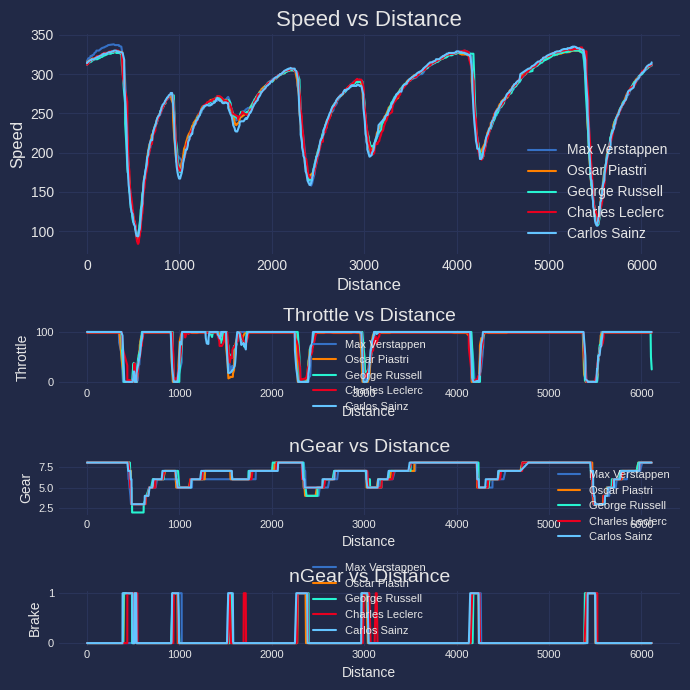

In [31]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_ver_quali.Distance, tele_ver_quali.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_pia_quali.Distance, tele_pia_quali.Speed, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[0].plot(
    tele_rus_quali.Distance, tele_rus_quali.Speed, label="George Russell", color=get_driver_color("RUS")
)
ax[0].plot(
    tele_lec_quali.Distance, tele_lec_quali.Speed, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[0].plot(
    tele_sai_quali.Distance, tele_sai_quali.Speed, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_ver_quali.Distance, tele_ver_quali.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_pia_quali.Distance, tele_pia_quali.Throttle, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[1].plot(
    tele_rus_quali.Distance, tele_rus_quali.Throttle, label="George Russell", color=get_driver_color("RUS")
)
ax[1].plot(
    tele_lec_quali.Distance, tele_lec_quali.Throttle, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[1].plot(
    tele_sai_quali.Distance, tele_sai_quali.Throttle, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_ver_quali.Distance, tele_ver_quali.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_pia_quali.Distance, tele_pia_quali.nGear, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[2].plot(
    tele_rus_quali.Distance, tele_rus_quali.nGear, label="George Russell", color=get_driver_color("RUS")
)
ax[2].plot(
    tele_lec_quali.Distance, tele_lec_quali.nGear, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[2].plot(
    tele_sai_quali.Distance, tele_sai_quali.nGear, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_ver_quali.Distance, tele_ver_quali.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_pia_quali.Distance, tele_pia_quali.Brake, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[3].plot(
    tele_rus_quali.Distance, tele_rus_quali.Brake, label="George Russell", color=get_driver_color("RUS")
)
ax[3].plot(
    tele_lec_quali.Distance, tele_lec_quali.Brake, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[3].plot(
    tele_sai_quali.Distance, tele_sai_quali.Brake, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [32]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_quali_sec1),
        "Sector1Time": pia_quali_sec1,
        "Sector2Time": pia_quali_sec2,
        "Sector3Time": pia_quali_sec3,
        "Lap Time": pia_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_quali_sec1),
        "Sector1Time": rus_quali_sec1,
        "Sector2Time": rus_quali_sec2,
        "Sector3Time": rus_quali_sec3,
        "Lap Time": rus_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_quali_sec1),
        "Sector1Time": lec_quali_sec1,
        "Sector2Time": lec_quali_sec2,
        "Sector3Time": lec_quali_sec3,
        "Lap Time": lec_quali_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Carlos Sainz"] * len(sai_quali_sec1),
        "Sector1Time": sai_quali_sec1,
        "Sector2Time": sai_quali_sec2,
        "Sector3Time": sai_quali_sec3,
        "Lap Time": sai_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Max Verstappen,0 days 00:00:31.970000,0 days 00:00:27.841000,0 days 00:00:28.337000,0 days 00:01:28.148000
2,Max Verstappen,0 days 00:00:48.533000,0 days 00:00:36.018000,0 days 00:00:39.931000,0 days 00:02:04.482000
4,Max Verstappen,0 days 00:00:31.874000,0 days 00:00:27.813000,0 days 00:00:28.091000,0 days 00:01:27.778000
5,Max Verstappen,0 days 00:00:47.654000,0 days 00:00:36.141000,0 days 00:00:41.751000,0 days 00:02:05.546000
7,Max Verstappen,0 days 00:00:31.710000,0 days 00:00:27.726000,0 days 00:00:28.093000,0 days 00:01:27.529000
8,Max Verstappen,0 days 00:00:44.202000,0 days 00:00:38.830000,0 days 00:00:40.802000,0 days 00:02:03.834000
10,Max Verstappen,0 days 00:00:32.054000,0 days 00:00:27.764000,0 days 00:00:28.122000,0 days 00:01:27.940000
11,Max Verstappen,0 days 00:00:37.136000,0 days 00:00:31.699000,0 days 00:00:39.492000,0 days 00:01:48.327000
14,Max Verstappen,0 days 00:00:31.829000,0 days 00:00:27.714000,0 days 00:00:28.016000,0 days 00:01:27.559000
15,Max Verstappen,0 days 00:00:34.228000,0 days 00:00:29.965000,0 days 00:00:34.269000,0 days 00:01:38.462000


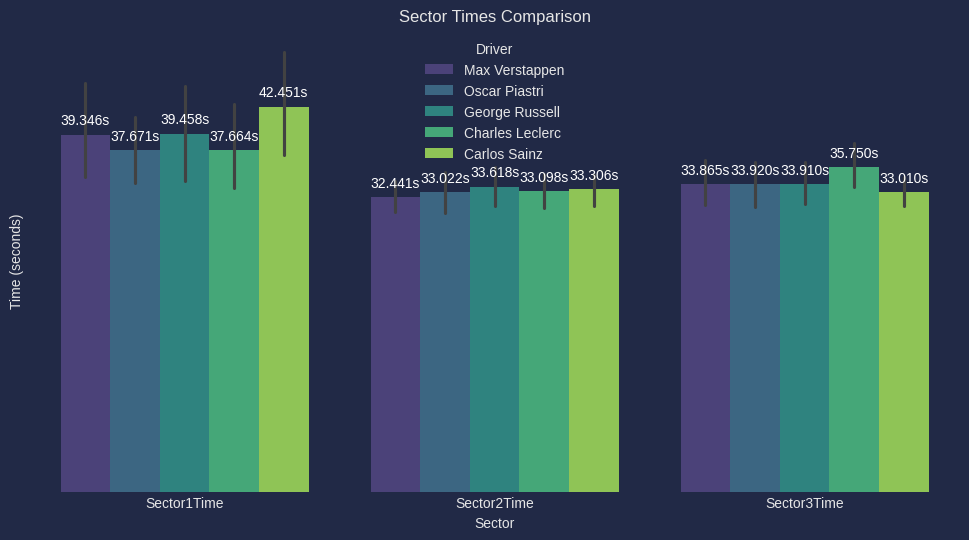

In [33]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

*Race*

In [34]:
race = f1.get_session(2025, "Saudi Arabia", "R")
race.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Cannot load lap times for first lap from Ergast. Timing data is not available for this session.
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
co

In [35]:
race.session_info

{'Meeting': {'Key': 1258,
  'Name': 'Saudi Arabian Grand Prix',
  'OfficialName': 'FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2025',
  'Location': 'Jeddah',
  'Number': 5,
  'Country': {'Key': 153, 'Code': 'KSA', 'Name': 'Saudi Arabia'},
  'Circuit': {'Key': 149, 'ShortName': 'Jeddah'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 10022,
 'Type': 'Race',
 'Name': 'Race',
 'StartDate': datetime.datetime(2025, 4, 20, 20, 0),
 'EndDate': datetime.datetime(2025, 4, 20, 22, 0),
 'GmtOffset': datetime.timedelta(seconds=10800),
 'Path': '2025/2025-04-20_Saudi_Arabian_Grand_Prix/2025-04-20_Race/'}

In [36]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
1,VER,Red Bull Racing,NaN,NaN,NaT,
81,PIA,McLaren,NaN,NaN,NaT,
63,RUS,Mercedes,NaN,NaN,NaT,
16,LEC,Ferrari,NaN,NaN,NaT,
12,ANT,Mercedes,NaN,NaN,NaT,
55,SAI,Williams,NaN,NaN,NaT,
44,HAM,Ferrari,NaN,NaN,NaT,
22,TSU,Red Bull Racing,NaN,NaN,NaT,
10,GAS,Alpine,NaN,NaN,NaT,
4,NOR,McLaren,NaN,NaN,NaT,


In [37]:
race_laps = race.laps
race_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:59:00.648000,VER,1,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.566000,...,True,Red Bull Racing,0 days 00:56:57.036000,2025-04-20 17:03:55.450,124,1.0,False,,False,False
1,0 days 01:01:45.579000,VER,1,NaT,2.0,1.0,NaT,NaT,0 days 00:01:08.808000,0 days 00:00:49.472000,...,True,Red Bull Racing,0 days 00:59:00.648000,2025-04-20 17:05:59.062,4,1.0,False,,False,False
2,0 days 01:04:41.012000,VER,1,NaT,3.0,1.0,NaT,NaT,0 days 00:00:55.546000,0 days 00:00:45.891000,...,True,Red Bull Racing,0 days 01:01:45.579000,2025-04-20 17:08:43.993,41,1.0,False,,False,False
3,0 days 01:06:14.843000,VER,1,0 days 00:01:33.831000,4.0,1.0,NaT,NaT,0 days 00:00:34.345000,0 days 00:00:29.659000,...,True,Red Bull Racing,0 days 01:04:41.012000,2025-04-20 17:11:39.426,1,1.0,False,,False,True
4,0 days 01:07:48.559000,VER,1,0 days 00:01:33.716000,5.0,1.0,NaT,NaT,0 days 00:00:34.376000,0 days 00:00:29.547000,...,True,Red Bull Racing,0 days 01:06:14.843000,2025-04-20 17:13:13.257,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,0 days 02:11:53.232000,BOR,5,0 days 00:01:35.517000,45.0,2.0,NaT,NaT,0 days 00:00:35.133000,0 days 00:00:30.055000,...,True,Kick Sauber,0 days 02:10:17.715000,2025-04-20 18:17:16.129,1,16.0,False,,False,True
894,0 days 02:13:32.216000,BOR,5,0 days 00:01:38.984000,46.0,2.0,NaT,NaT,0 days 00:00:37.513000,0 days 00:00:31.270000,...,True,Kick Sauber,0 days 02:11:53.232000,2025-04-20 18:18:51.646,1,17.0,False,,False,True
895,0 days 02:15:10.560000,BOR,5,0 days 00:01:38.344000,47.0,2.0,NaT,NaT,0 days 00:00:35.303000,0 days 00:00:31.224000,...,True,Kick Sauber,0 days 02:13:32.216000,2025-04-20 18:20:30.630,1,17.0,False,,False,True
896,0 days 02:16:47.690000,BOR,5,0 days 00:01:37.130000,48.0,2.0,NaT,NaT,0 days 00:00:36.846000,0 days 00:00:30.120000,...,True,Kick Sauber,0 days 02:15:10.560000,2025-04-20 18:22:08.974,1,17.0,False,,False,True


In [38]:
pia_race_laps = race.laps.pick_driver("PIA")
fastest_lap_pia_race = pia_race_laps.pick_fastest().LapTime
pia_race_lap_time = pia_race_laps["LapTime"]
pia_race_sec1 = pia_race_laps["Sector1Time"]
pia_race_sec2 = pia_race_laps["Sector2Time"]
pia_race_sec3 = pia_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_pia_race), "which was in Lap number" ,pia_race_laps.pick_fastest().LapNumber)
pia_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:32.228000 which was in Lap number 50.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
50,NaT,NaT,0 days 00:00:29.518000,0 days 00:00:58.921000,287.0,304.0,163.0,145.0
51,NaT,0 days 00:01:08.447000,0 days 00:00:49.209000,0 days 00:00:46.412000,143.0,175.0,269.0,226.0
52,NaT,0 days 00:00:56.071000,0 days 00:00:46.270000,0 days 00:01:12.862000,238.0,145.0,295.0,82.0
53,0 days 00:01:34.247000,0 days 00:00:34.829000,0 days 00:00:29.607000,0 days 00:00:29.811000,287.0,300.0,294.0,307.0
54,0 days 00:01:33.418000,0 days 00:00:34.522000,0 days 00:00:29.411000,0 days 00:00:29.485000,289.0,303.0,304.0,325.0


In [39]:
fastest_lap_pia_race = pia_race_laps.pick_fastest()
tele_pia_race = fastest_lap_pia_race.get_telemetry().add_distance()
speed_pia_race = tele_pia_race.Speed
tele_pia_race.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,303,8,10725
3,304,8,10746
4,305,8,10788
5,305,8,10779
6,306,8,10771
...,...,...,...
684,297,8,10249
685,296,8,10232
686,294,8,10200
687,293,8,10169


In [40]:
ver_race_laps = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race_laps.pick_fastest().LapTime
ver_race_lap_time = ver_race_laps["LapTime"]
ver_race_sec1 = ver_race_laps["Sector1Time"]
ver_race_sec2 = ver_race_laps["Sector2Time"]
ver_race_sec3 = ver_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_race), "which was in Lap number" ,ver_race_laps.pick_fastest().LapNumber)
ver_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:32.280000 which was in Lap number 49.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:29.566000,0 days 00:00:57.946000,284.0,294.0,193.0,175.0
1,NaT,0 days 00:01:08.808000,0 days 00:00:49.472000,0 days 00:00:46.620000,157.0,141.0,215.0,236.0
2,NaT,0 days 00:00:55.546000,0 days 00:00:45.891000,0 days 00:01:14.117000,241.0,214.0,289.0,80.0
3,0 days 00:01:33.831000,0 days 00:00:34.345000,0 days 00:00:29.659000,0 days 00:00:29.827000,286.0,294.0,291.0,298.0
4,0 days 00:01:33.716000,0 days 00:00:34.376000,0 days 00:00:29.547000,0 days 00:00:29.793000,285.0,295.0,292.0,299.0


In [41]:
fastest_lap_ver_race = ver_race_laps.pick_fastest()
tele_ver_race = fastest_lap_ver_race.get_telemetry().add_distance()
speed_ver_race = tele_ver_race.Speed
tele_ver_race.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,314,8,11191
3,315,8,11215
4,316,8,11226
5,317,8,11237
6,318,8,11248
...,...,...,...
688,300,7,11832
689,301,7,11859
690,302,7,11886
691,302,7,11522


In [42]:
lec_race_laps = race.laps.pick_driver("LEC")
fastest_lap_lec_race = lec_race_laps.pick_fastest().LapTime
lec_race_lap_time = lec_race_laps["LapTime"]
lec_race_sec1 = lec_race_laps["Sector1Time"]
lec_race_sec2 = lec_race_laps["Sector2Time"]
lec_race_sec3 = lec_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_lec_race), "which was in Lap number" ,lec_race_laps.pick_fastest().LapNumber)
lec_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:32.192000 which was in Lap number 49.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
150,NaT,NaT,0 days 00:00:29.948000,0 days 00:01:00.075000,287.0,292.0,172.0,123.0
151,NaT,0 days 00:01:09.037000,0 days 00:00:48.687000,0 days 00:00:47.002000,124.0,187.0,251.0,254.0
152,NaT,0 days 00:00:56.104000,0 days 00:00:45.173000,0 days 00:01:10.598000,223.0,156.0,308.0,78.0
153,0 days 00:01:35.845000,0 days 00:00:36.226000,0 days 00:00:29.756000,0 days 00:00:29.863000,287.0,306.0,296.0,320.0
154,0 days 00:01:34.428000,0 days 00:00:35.045000,0 days 00:00:29.634000,0 days 00:00:29.749000,289.0,315.0,297.0,311.0


In [43]:
fastest_lap_lec_race = lec_race_laps.pick_fastest()
tele_lec_race = fastest_lap_lec_race.get_telemetry().add_distance()
speed_lec_race = tele_lec_race.Speed
tele_lec_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,303,8,10821
3,304,8,10845
4,305,8,10874
5,306,8,10904
6,307,8,10930
...,...,...,...
682,301,8,10747
683,302,8,10776
684,304,8,10776
685,304,8,10831


In [44]:
rus_race_laps = race.laps.pick_driver("RUS")
fastest_lap_rus_race = rus_race_laps.pick_fastest().LapTime
rus_race_lap_time = rus_race_laps["LapTime"]
rus_race_sec1 = rus_race_laps["Sector1Time"]
rus_race_sec2 = rus_race_laps["Sector2Time"]
rus_race_sec3 = rus_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_race), "which was in Lap number" ,rus_race_laps.pick_fastest().LapNumber)
rus_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:32.893000 which was in Lap number 32.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
100,NaT,NaT,0 days 00:00:29.796000,0 days 00:01:00.073000,285.0,309.0,174.0,128.0
101,NaT,0 days 00:01:08.389000,0 days 00:00:48.786000,0 days 00:00:46.575000,95.0,153.0,254.0,232.0
102,NaT,0 days 00:00:55.615000,0 days 00:00:45.630000,0 days 00:01:12.223000,223.0,175.0,304.0,79.0
103,0 days 00:01:35.170000,0 days 00:00:35.754000,0 days 00:00:29.477000,0 days 00:00:29.939000,286.0,306.0,295.0,317.0
104,0 days 00:01:33.996000,0 days 00:00:34.781000,0 days 00:00:29.406000,0 days 00:00:29.809000,289.0,305.0,298.0,316.0


In [45]:
fastest_lap_rus_race = rus_race_laps.pick_fastest()
tele_rus_race = fastest_lap_rus_race.get_telemetry().add_distance()
speed_rus_race = tele_rus_race.Speed
tele_rus_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,299,8,10724
3,300,8,10749
4,301,8,10800
5,302,8,10810
6,303,8,10821
...,...,...,...
692,297,8,10610
693,298,8,10635
694,298,8,10652
695,299,8,10670


In [46]:
sai_race_laps = race.laps.pick_driver("SAI")
fastest_lap_sai_race = sai_race_laps.pick_fastest().LapTime
sai_race_lap_time = sai_race_laps["LapTime"]
sai_race_sec1 = sai_race_laps["Sector1Time"]
sai_race_sec2 = sai_race_laps["Sector2Time"]
sai_race_sec3 = sai_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_sai_race), "which was in Lap number" ,sai_race_laps.pick_fastest().LapNumber)
sai_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:32.466000 which was in Lap number 50.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
250,NaT,NaT,0 days 00:00:30.492000,0 days 00:01:03.293000,286.0,203.0,237.0,119.0
251,NaT,0 days 00:01:06.516000,0 days 00:00:49.245000,0 days 00:00:47.623000,212.0,172.0,245.0,250.0
252,NaT,0 days 00:00:56.191000,0 days 00:00:43.860000,0 days 00:01:08.501000,213.0,181.0,303.0,72.0
253,0 days 00:01:36.814000,0 days 00:00:36.831000,0 days 00:00:29.882000,0 days 00:00:30.101000,289.0,311.0,297.0,321.0
254,0 days 00:01:35.717000,0 days 00:00:35.964000,0 days 00:00:29.945000,0 days 00:00:29.808000,283.0,308.0,299.0,317.0


In [47]:
fastest_lap_sai_race = sai_race_laps.pick_fastest()
tele_sai_race = fastest_lap_sai_race.get_telemetry().add_distance()
speed_sai_race = tele_sai_race.Speed
tele_sai_race.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,301,8,10797
3,302,8,10802
4,303,8,10819
5,304,8,10837
6,304,8,10863
...,...,...,...
698,301,8,10790
699,302,8,10803
700,303,8,10817
701,303,8,10836


In [48]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_race_sec1),
        "Sector1Time": pia_race_sec1,
        "Sector2Time": pia_race_sec2,
        "Sector3Time": pia_race_sec3,
        "Lap Time": pia_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_race_sec1),
        "Sector1Time": lec_race_sec1,
        "Sector2Time": lec_race_sec2,
        "Sector3Time": lec_race_sec3,
        "Lap Time": lec_race_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_race_sec1),
        "Sector1Time": rus_race_sec1,
        "Sector2Time": rus_race_sec2,
        "Sector3Time": rus_race_sec3,
        "Lap Time": rus_race_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Carlos Sainz"] * len(sai_race_sec1),
        "Sector1Time": sai_race_sec1,
        "Sector2Time": sai_race_sec2,
        "Sector3Time": sai_race_sec3,
        "Lap Time": sai_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
3,Oscar Piastri,0 days 00:00:34.829000,0 days 00:00:29.607000,0 days 00:00:29.811000,0 days 00:01:34.247000
4,Oscar Piastri,0 days 00:00:34.522000,0 days 00:00:29.411000,0 days 00:00:29.485000,0 days 00:01:33.418000
5,Oscar Piastri,0 days 00:00:34.783000,0 days 00:00:29.453000,0 days 00:00:29.681000,0 days 00:01:33.917000
6,Oscar Piastri,0 days 00:00:34.373000,0 days 00:00:29.422000,0 days 00:00:29.728000,0 days 00:01:33.523000
7,Oscar Piastri,0 days 00:00:34.442000,0 days 00:00:29.510000,0 days 00:00:29.941000,0 days 00:01:33.893000
...,...,...,...,...,...
245,Carlos Sainz,0 days 00:00:34.432000,0 days 00:00:29.551000,0 days 00:00:29.553000,0 days 00:01:33.536000
246,Carlos Sainz,0 days 00:00:34.496000,0 days 00:00:29.541000,0 days 00:00:29.603000,0 days 00:01:33.640000
247,Carlos Sainz,0 days 00:00:34.541000,0 days 00:00:29.467000,0 days 00:00:29.583000,0 days 00:01:33.591000
248,Carlos Sainz,0 days 00:00:34.599000,0 days 00:00:29.639000,0 days 00:00:29.564000,0 days 00:01:33.802000


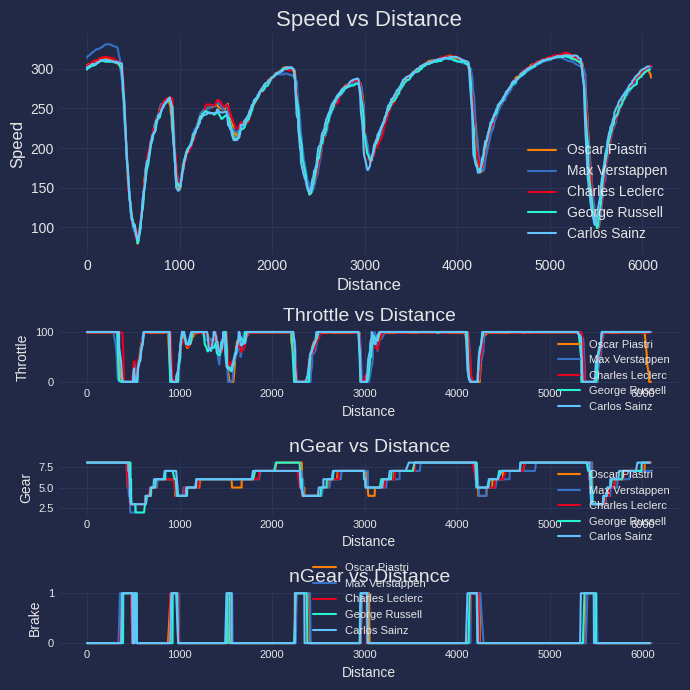

In [49]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = race.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_pia_race.Distance, tele_pia_race.Speed, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[0].plot(
    tele_ver_race.Distance, tele_ver_race.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_lec_race.Distance, tele_lec_race.Speed, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[0].plot(
    tele_rus_race.Distance, tele_rus_race.Speed, label="George Russell", color=get_driver_color("RUS")
)
ax[0].plot(
    tele_sai_race.Distance, tele_sai_race.Speed, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_pia_race.Distance, tele_pia_race.Throttle, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[1].plot(
    tele_ver_race.Distance, tele_ver_race.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_lec_race.Distance, tele_lec_race.Throttle, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[1].plot(
    tele_rus_race.Distance, tele_rus_race.Throttle, label="George Russell", color=get_driver_color("RUS")
)
ax[1].plot(
    tele_sai_race.Distance, tele_sai_race.Throttle, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_pia_race.Distance, tele_pia_race.nGear, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[2].plot(
    tele_ver_race.Distance, tele_ver_race.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_lec_race.Distance, tele_lec_race.nGear, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[2].plot(
    tele_rus_race.Distance, tele_rus_race.nGear, label="George Russell", color=get_driver_color("RUS")
)
ax[2].plot(
    tele_sai_race.Distance, tele_sai_race.nGear, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_pia_race.Distance, tele_pia_race.Brake, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[3].plot(
    tele_ver_race.Distance, tele_ver_race.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_lec_race.Distance, tele_lec_race.Brake, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[3].plot(
    tele_rus_race.Distance, tele_rus_race.Brake, label="George Russell", color=get_driver_color("RUS")
)
ax[3].plot(
    tele_sai_race.Distance, tele_sai_race.Brake, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [50]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_race_sec1),
        "Sector1Time": pia_race_sec1,
        "Sector2Time": pia_race_sec2,
        "Sector3Time": pia_race_sec3,
        "Lap Time": pia_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_race_sec1),
        "Sector1Time": lec_race_sec1,
        "Sector2Time": lec_race_sec2,
        "Sector3Time": lec_race_sec3,
        "Lap Time": lec_race_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_race_sec1),
        "Sector1Time": rus_race_sec1,
        "Sector2Time": rus_race_sec2,
        "Sector3Time": rus_race_sec3,
        "Lap Time": rus_race_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Carlos Sainz"] * len(sai_race_sec1),
        "Sector1Time": sai_race_sec1,
        "Sector2Time": sai_race_sec2,
        "Sector3Time": sai_race_sec3,
        "Lap Time": sai_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
3,Oscar Piastri,0 days 00:00:34.829000,0 days 00:00:29.607000,0 days 00:00:29.811000,0 days 00:01:34.247000
4,Oscar Piastri,0 days 00:00:34.522000,0 days 00:00:29.411000,0 days 00:00:29.485000,0 days 00:01:33.418000
5,Oscar Piastri,0 days 00:00:34.783000,0 days 00:00:29.453000,0 days 00:00:29.681000,0 days 00:01:33.917000
6,Oscar Piastri,0 days 00:00:34.373000,0 days 00:00:29.422000,0 days 00:00:29.728000,0 days 00:01:33.523000
7,Oscar Piastri,0 days 00:00:34.442000,0 days 00:00:29.510000,0 days 00:00:29.941000,0 days 00:01:33.893000
...,...,...,...,...,...
245,Carlos Sainz,0 days 00:00:34.432000,0 days 00:00:29.551000,0 days 00:00:29.553000,0 days 00:01:33.536000
246,Carlos Sainz,0 days 00:00:34.496000,0 days 00:00:29.541000,0 days 00:00:29.603000,0 days 00:01:33.640000
247,Carlos Sainz,0 days 00:00:34.541000,0 days 00:00:29.467000,0 days 00:00:29.583000,0 days 00:01:33.591000
248,Carlos Sainz,0 days 00:00:34.599000,0 days 00:00:29.639000,0 days 00:00:29.564000,0 days 00:01:33.802000


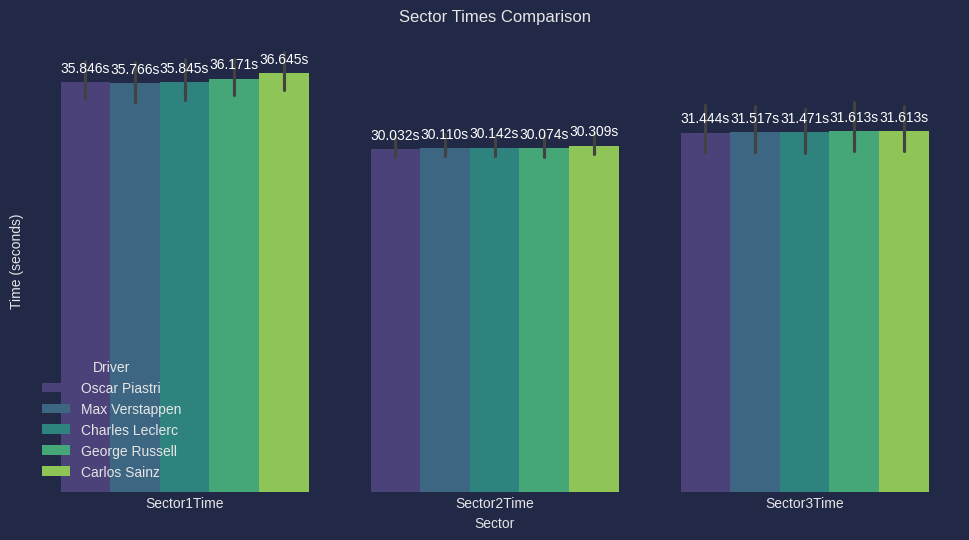

In [51]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

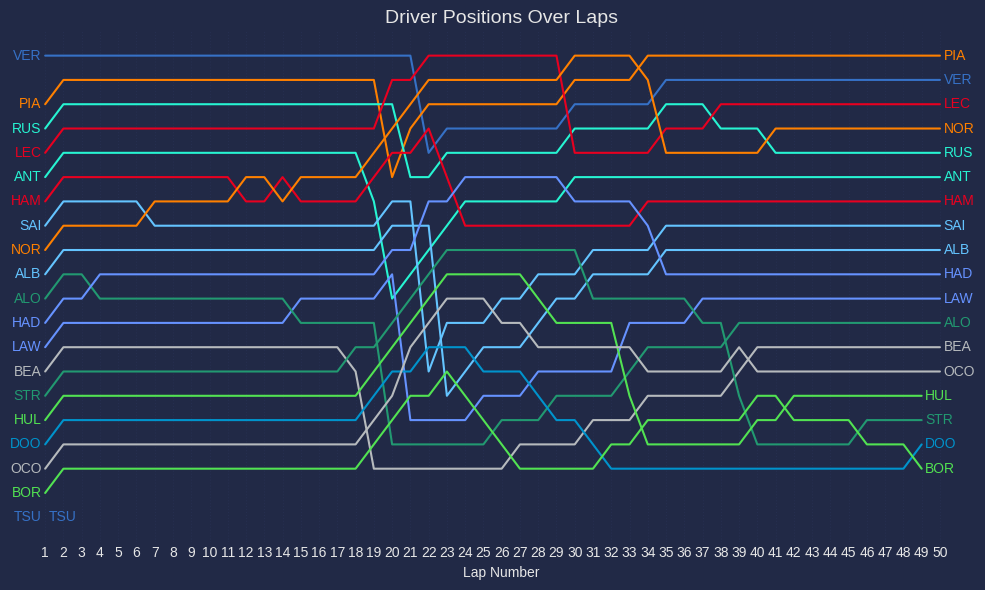

In [52]:
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

team_colors = {}

for driver in drivers_ab:
    driver_object = race.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

plt.figure(figsize=(10, 6))
for driver in drivers_ab:
    positions = race_laps[race_laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    plt.text(
        1 - 0.2,
        positions[0],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='right'
    )
    
    plt.text(
        len(positions) + 0.2,
        positions[-1],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left'
    )

plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

In [ ]:
def getDriverPosition(abbreviation: str):
    res = race.results
    abbr = res["Abbreviation"] == abbreviation
    pos = res.loc[abbr, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "#000000")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()

In [54]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/tmp/ipykernel_10875/905247657.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
7,TSU,266.0
0,VER,325.0
6,HAM,328.0
3,LEC,329.0
4,ANT,330.0
15,STR,330.0
18,OCO,331.0
9,NOR,332.0
2,RUS,333.0
11,LAW,334.0


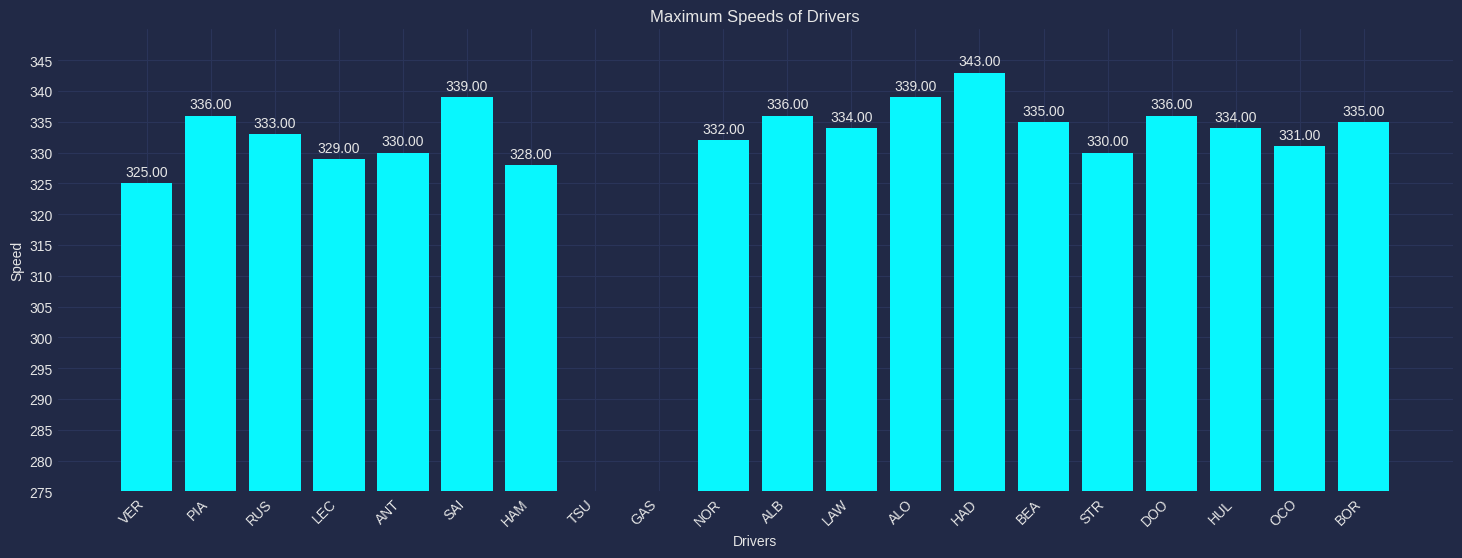

In [55]:
fig,ax = plt.subplots(figsize=(18, 6))
bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])
ax.set_xlabel('Drivers')
ax.set_ylabel('Speed')
ax.set_title('Maximum Speeds of Drivers')
plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

In [56]:
plotting.setup_mpl()

/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [57]:
laps_ver = race_laps.pick_driver("VER")
laps_pia = race_laps.pick_driver("PIA")

fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_pia = laps_pia.pick_fastest().get_telemetry().add_distance()

fastest_ver["Driver"] = "VER"
fastest_pia["Driver"] = "PIA"
telemetry = pd.concat([fastest_ver,fastest_pia])

/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [58]:
num_minisectors = 25
total_distance = total_distance = max(telemetry['Distance'])
minisector_length = total_distance / num_minisectors
minisectors = [0]
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [59]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,PIA,309.826087
1,1,VER,324.041667
2,2,PIA,239.407407
3,2,VER,226.870968
4,3,PIA,130.339623
5,3,VER,127.239130
6,4,PIA,231.142857
7,4,VER,236.136364
8,5,PIA,193.054054
9,5,VER,194.264706


In [60]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [61]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

telemetry = telemetry.sort_values(by=['Distance'])

telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'PIA', 'Fastest_driver_int'] = 2

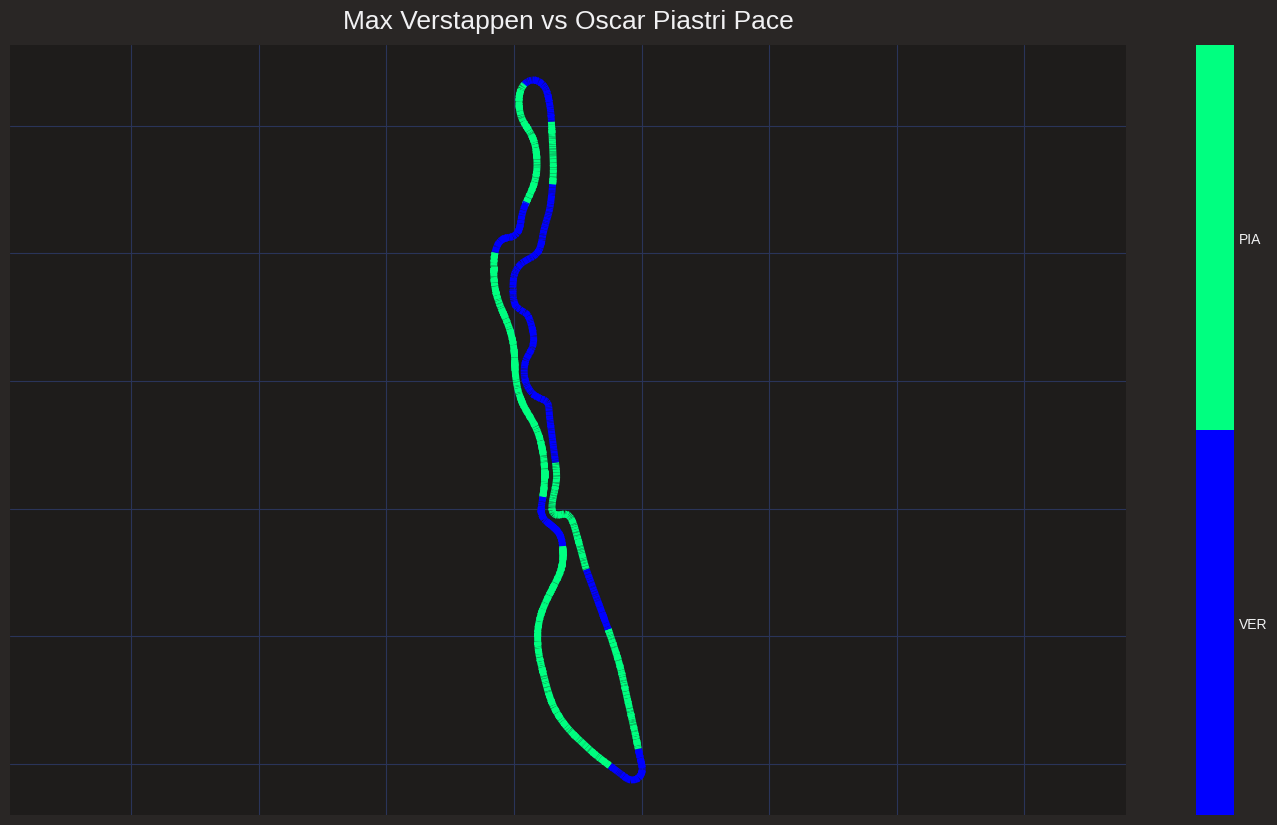

In [62]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['VER', 'PIA'])
plt.title("Max Verstappen vs Oscar Piastri Pace")
plt.show()
